#### 4. Data Visualization I

#### 4.1 Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
#### 4.2 Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

#### Preprocessing the data 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("titanic.csv");
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df = df.astype({
    "Name" : "string",
    "Sex" : "string",
    "Ticket" : "string",
    "Cabin" : "string",
    "Embarked" : "string"
});

In [11]:
df.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name           string[python]
Sex            string[python]
Age                   float64
SibSp                   int64
Parch                   int64
Ticket         string[python]
Fare                  float64
Cabin          string[python]
Embarked       string[python]
dtype: object

#### Checking for missing values

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df["Age"] = df["Age"].fillna(df["Age"].mean());
df["Cabin"] = df["Cabin"].ffill();

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### 4.1 Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.

#### 4.1.1 Visualization of attribute 'Pclass' based on target attribute 'survived'

<Axes: xlabel='Pclass', ylabel='count'>

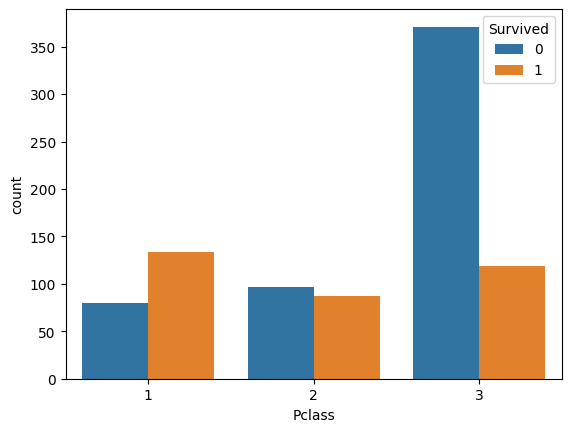

In [18]:
sns.countplot(data = df, x = "Pclass", hue = "Survived")

#### Observation : Class 3 passengers survived the least and Class 1 passengers survived the most

#### 4.1.2 Visualization of attribute 'Sex' based on target attribute 'survived'

<Axes: xlabel='Sex', ylabel='count'>

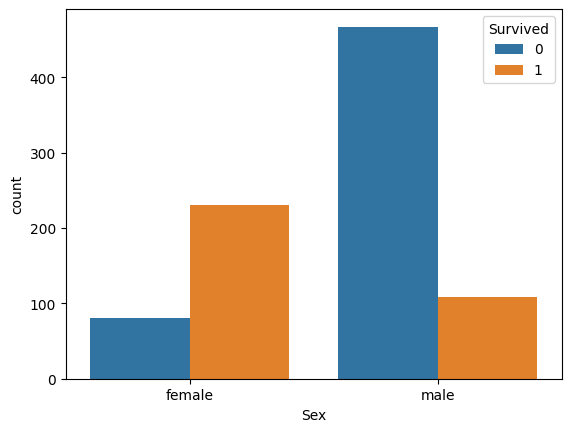

In [19]:
sns.countplot(data = df, x = "Sex", hue = "Survived")

#### Observation : Female passengers survived the most and Male passengers survived the least

#### 4.1.3 Visualization of attribute 'Age' based on target attribute 'survived'

count    548.000000
mean      30.430456
std       12.463550
min        1.000000
25%       23.000000
50%       29.699118
75%       35.000000
max       74.000000
Name: Age, dtype: float64
count    340.000000
mean      28.423600
std       13.682862
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Survived', ylabel='Age'>

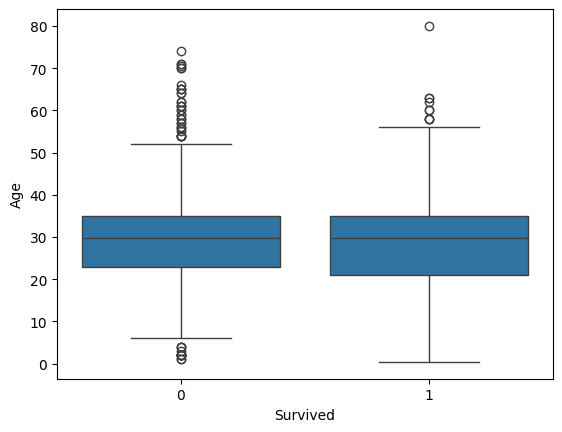

In [23]:
print( df.loc[df["Survived"] == 0, "Age"].describe() )
print( df.loc[df["Survived"] == 1, "Age"].describe() )
sns.boxplot(data = df, x = "Survived" ,y = "Age") #See this 

#### Observation : The distribution of survival of male and female is almost the same statistically

#### 4.1.4 Visualization of attribute 'Embarked' based on target attribute 'survived'

<Axes: xlabel='Embarked', ylabel='count'>

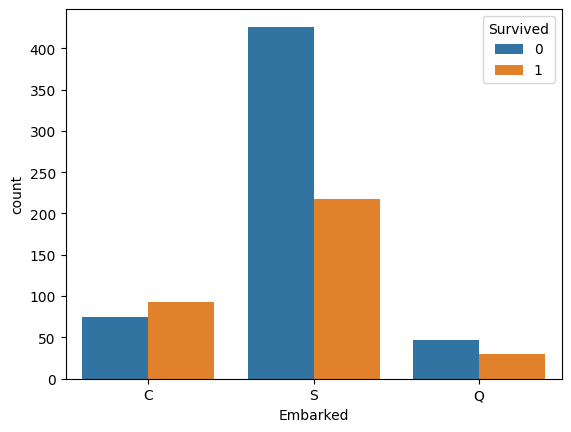

In [25]:
sns.countplot(data = df, x = "Embarked", hue = "Survived")

#### Observation : Most of the poeple who survived or not emabarked from Southampton

#### 4.1.5 Visualization of attribute 'SibSp' based on target attribute 'survived'

<Axes: xlabel='SibSp', ylabel='count'>

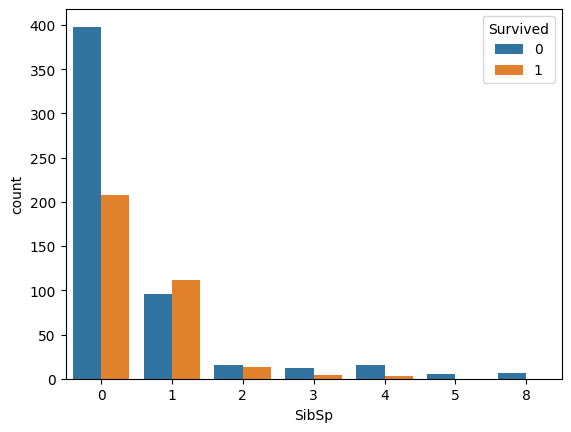

In [26]:
sns.countplot(data = df, x = "SibSp", hue = "Survived")

#### Observation : Most of the people who boarded titanic didnt had a sibling or spouse

#### 4.1.6 Visualization of attribute 'Parch' based on target attribute 'survived'

<Axes: xlabel='Parch', ylabel='count'>

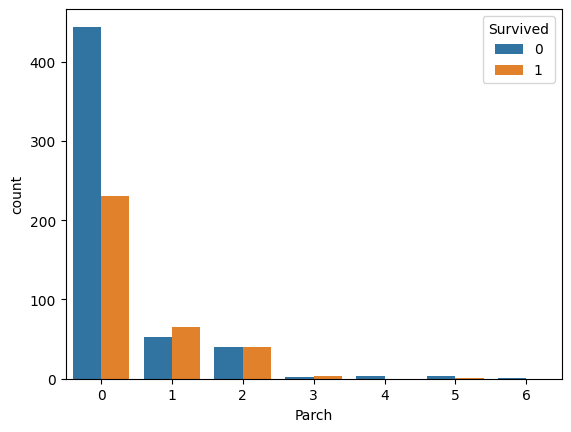

In [27]:
sns.countplot(data = df, x = "Parch", hue = "Survived")

#### Observation : Most of the people who boarded titanic didnt had a parent or a children

#### 4.2 Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

<Axes: xlabel='Fare', ylabel='Count'>

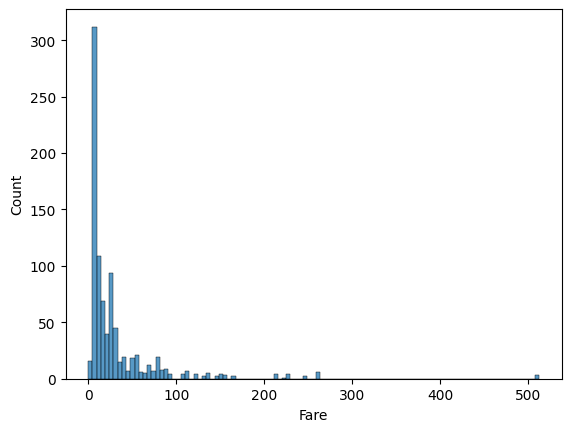

In [29]:
sns.histplot(data = df,x = "Fare")

#### Observation : Majority of the people who boarded titanix has a ticket of less then $100